The code below produces a basic boxplot using the `boxplot()` function of seaborn. When you look at the graph, it is easy to conclude that the ‘C’ group has a higher value than the others. However, we cannot see what is the **underlying distribution** of dots in each group, neither the **number of observations** for each.


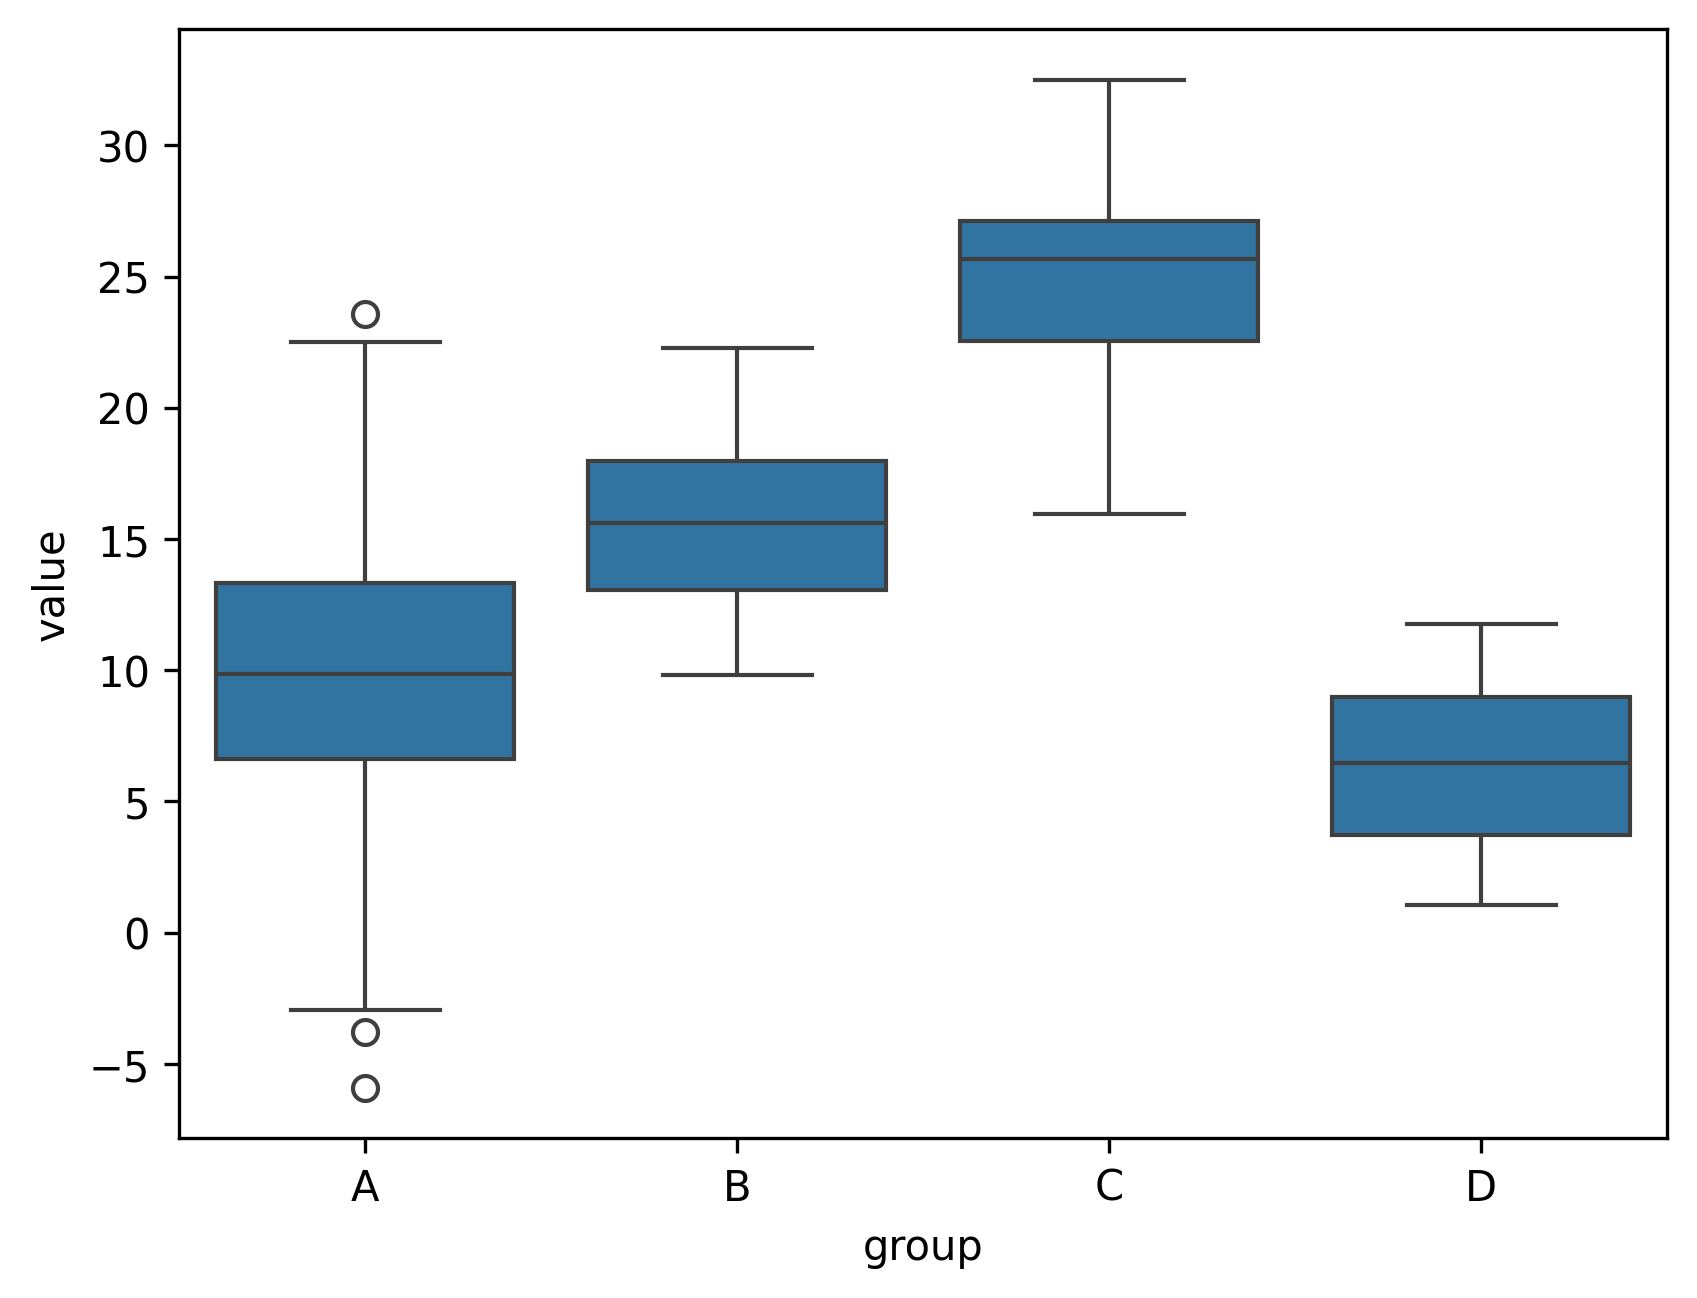

In [8]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
 
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df = pd.concat([a,b,c,d,e])
 
# Usual boxplot
sns.boxplot(x='group', y='value', data=df)
plt.show()

Let’s see a few techniques allowing to avoid that:


## Add Jitter


By adding a stripplot, you can show all observations along with some representation of the underlying distribution.


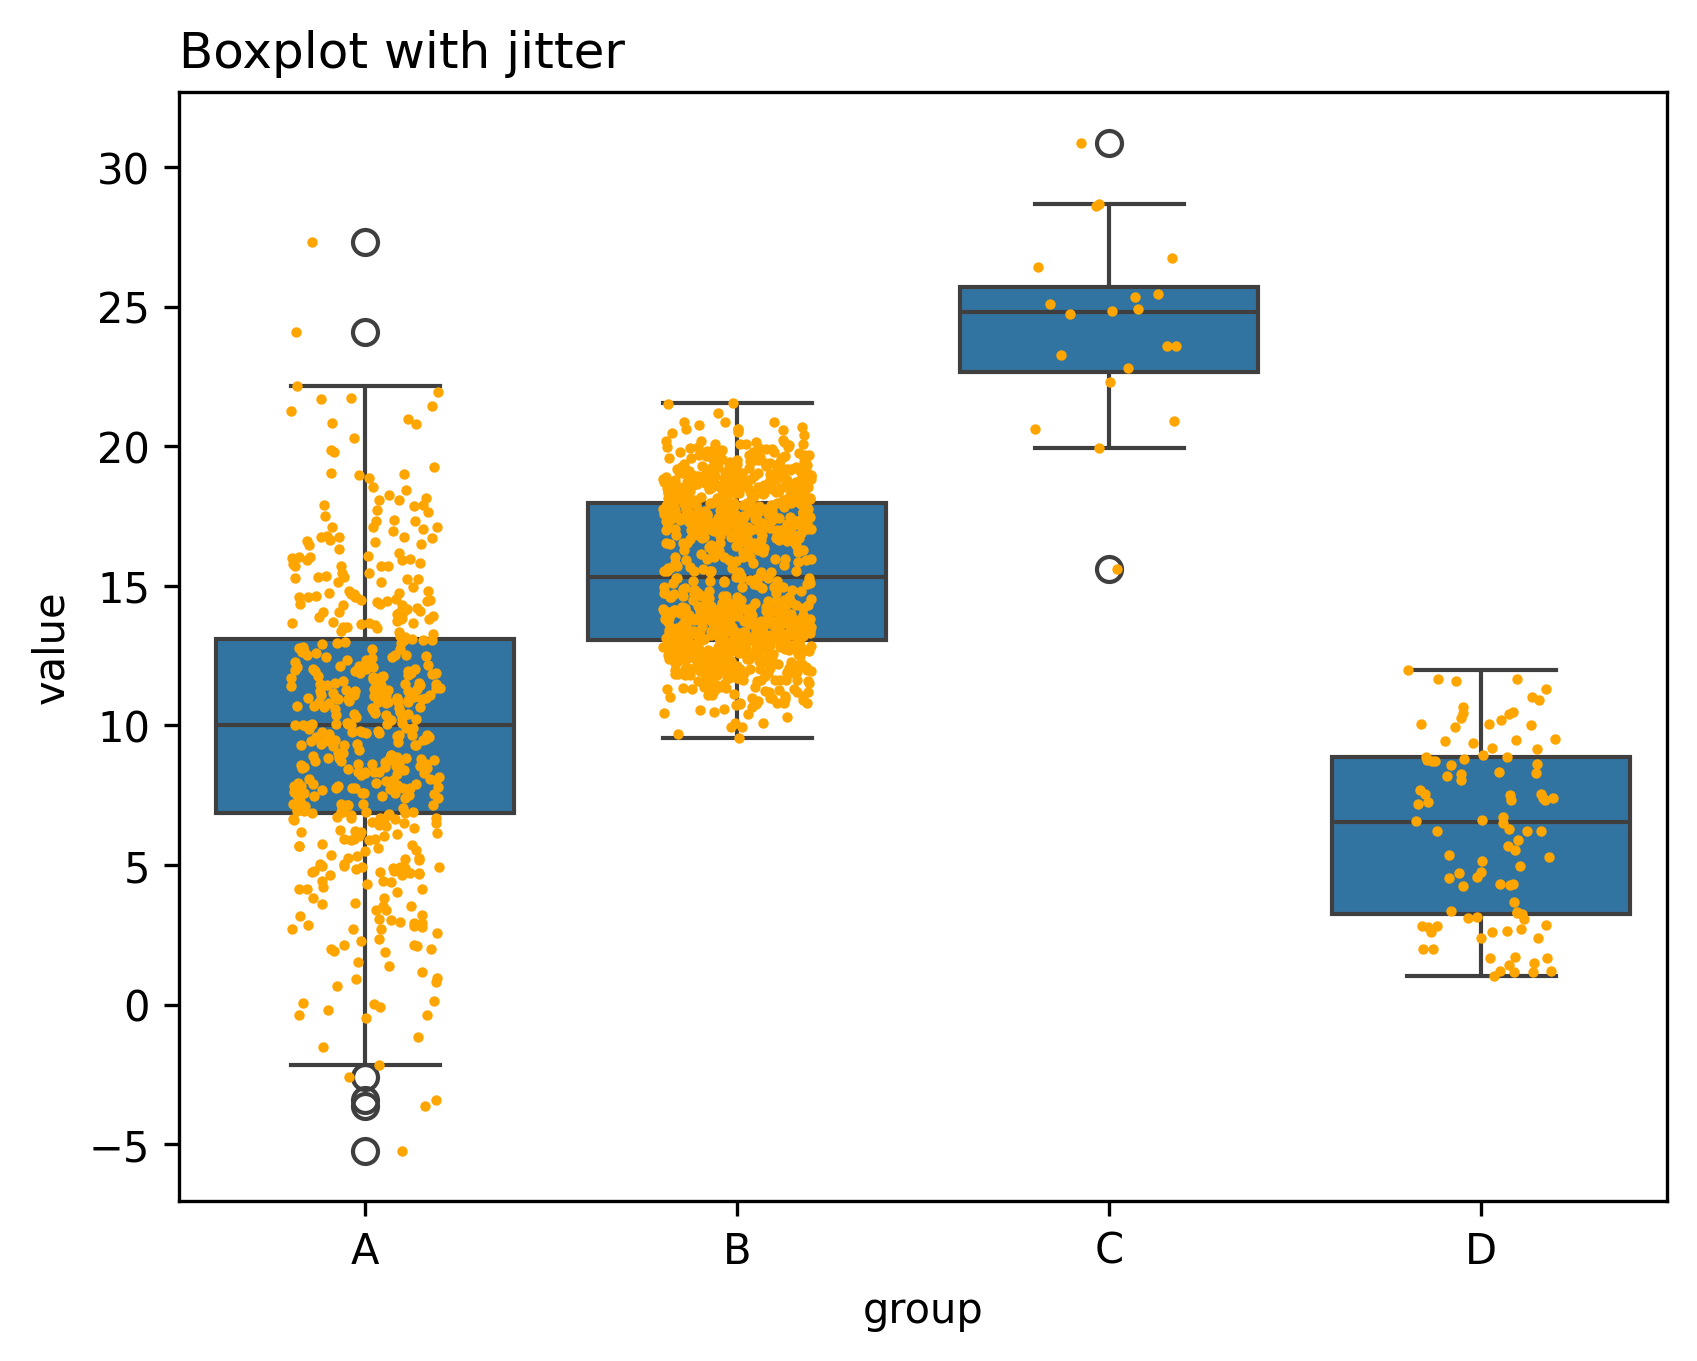

In [9]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
 
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df = pd.concat([a,b,c,d,e])

# boxplot
ax = sns.boxplot(x='group', y='value', data=df)
# add stripplot
ax = sns.stripplot(x='group', y='value', data=df, color="orange", jitter=0.2, size=2.5)

# add title
plt.title("Boxplot with jitter", loc="left")

# show the graph
plt.show()

## Violin Plot


Violin plots are perfect for showing the distribution of the data. You can prefer to use violin chart instead of boxplot if the distribution of your data is important and you don't want to loose any information.


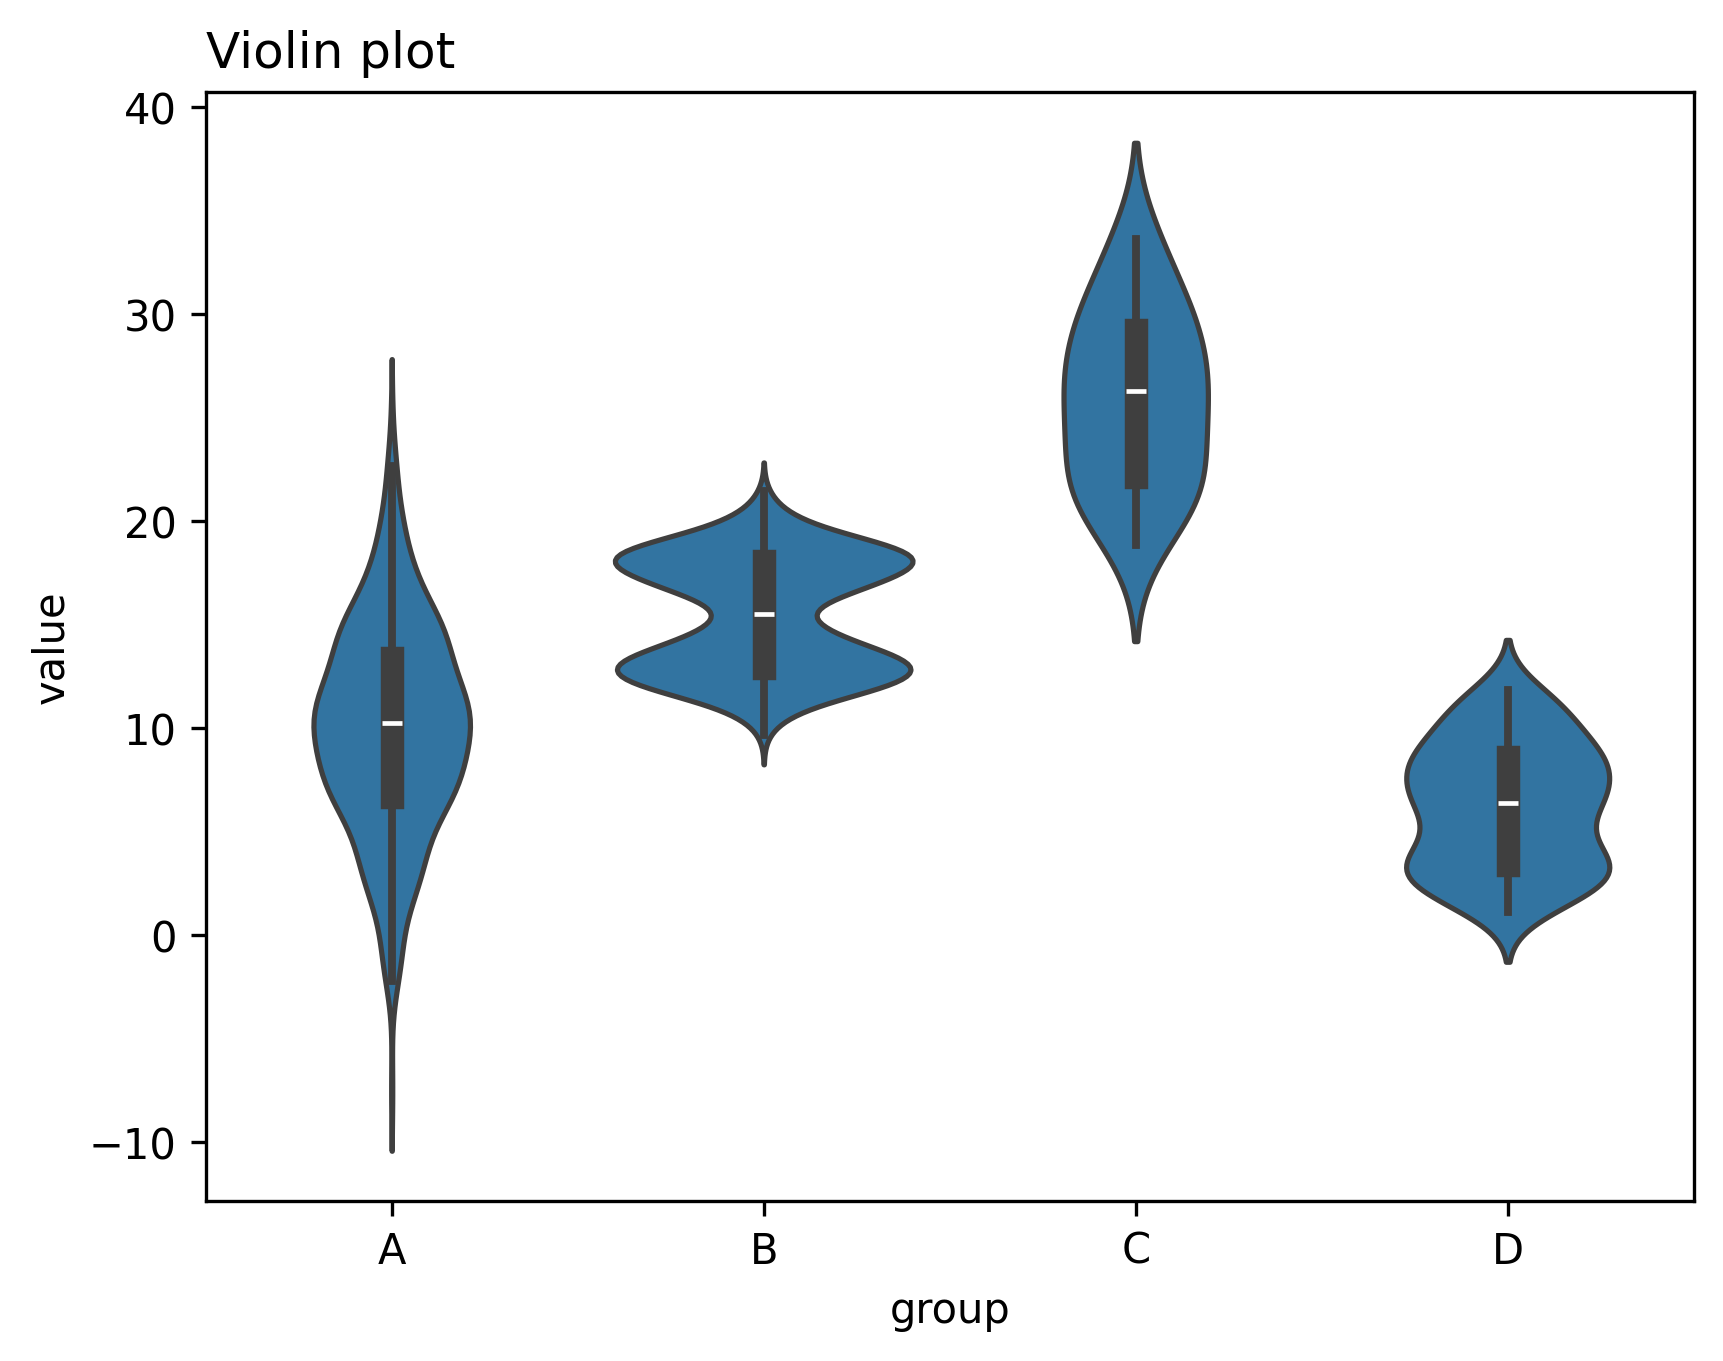

In [10]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
 
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df = pd.concat([a,b,c,d,e])

# plot violin chart
sns.violinplot( x='group', y='value', data=df)

# add title
plt.title("Violin plot", loc="left")

# show the graph
plt.show()

## Show Number of Observations


Another solution is to show the number of observations in the boxplot. The following code shows how to do it:


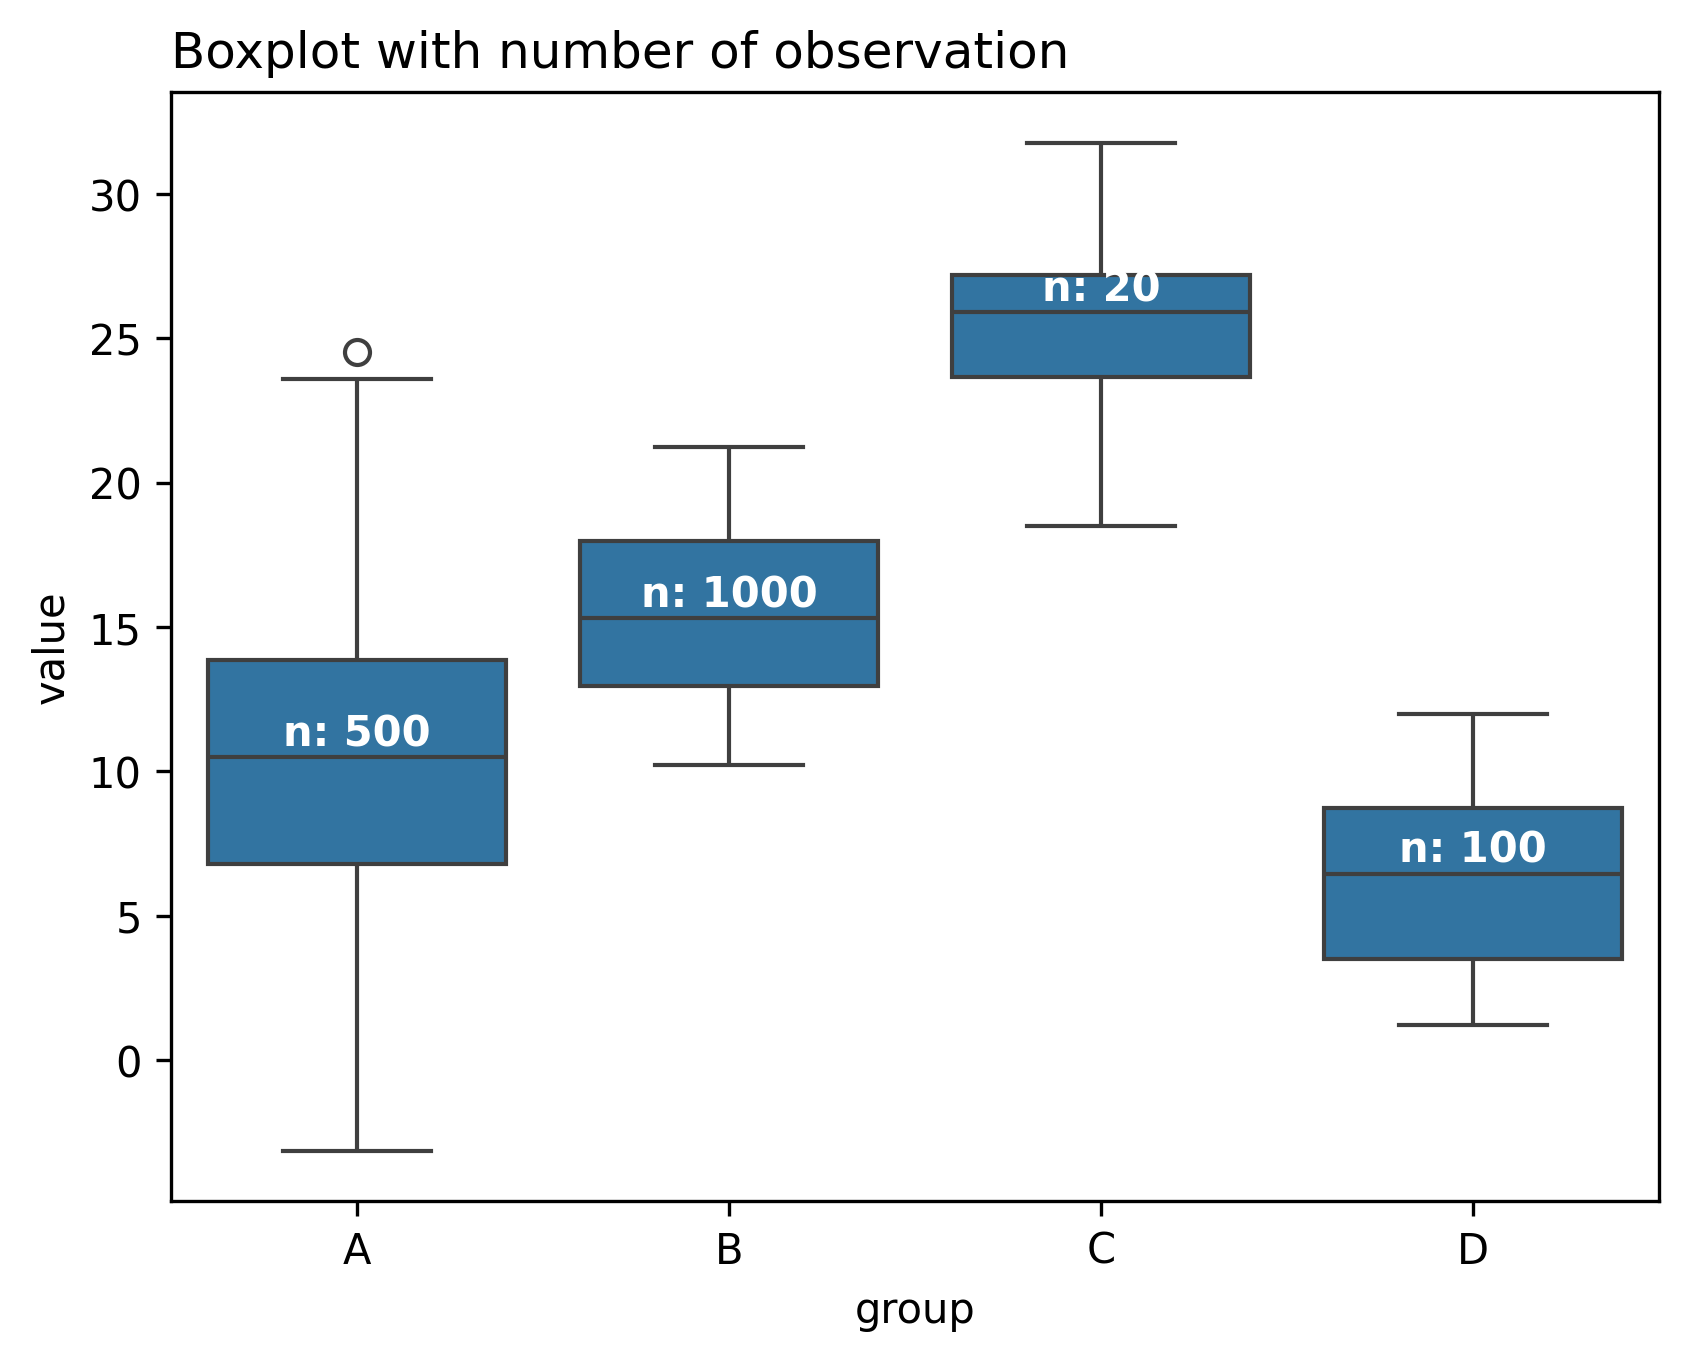

In [11]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
 
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df = pd.concat([a,b,c,d,e])

# Start with a basic boxplot
sns.boxplot(x="group", y="value", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['group'])['value'].median().values
nobs = df.groupby("group").size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.4, nobs[tick], horizontalalignment='center', size='medium', color='w', weight='semibold')

# add title
plt.title("Boxplot with number of observation", loc="left")

# show the graph
plt.show()